In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## DATA VALIDATION STAGE

In [2]:
#importing the data
data = pd.read_csv('C:\\Users\\user\\Downloads\\restuarant_claims.csv')

In [3]:
data.head()
#to print the first 5 rows of the dataset

,LAWSUIT NUMBER,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION
0,0000000-00.2010.0.00.0094,TAX,7/5/2010,17/3/2016,"R$50,000.00","R$15,000.00",RECIFE,-,NaN,NaN
1,0000000-00.2011.0.00.0086,TAX,3/3/2011,NaN,"R$180,000.00",NaN,SÃO LUÍS,-,NaN,NaN
2,0000000-00.2012.0.00.0092,TAX,17/10/2012,NaN,"R$70,000.00",NaN,SÃO LUÍS,-,NaN,NaN
3,0000000-00.2013.0.00.0096,TAX,17/12/2013,2/2/2017,"R$95,104.00","R$72,279.00",FORTALEZA,-,NaN,NaN
4,0000000-00.2014.0.00.0097,TAX,15/1/2014,5/12/2014,"R$29,000.00","R$5,800.00",FORTALEZA,-,NaN,NaN


In [4]:
data.tail()
#to print the last 5 rowws of the dataset

,LAWSUIT NUMBER,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION
93,0000000-00.2020.0.00.0023,LABOR,6/6/2020,NaN,"R$80,396.00",NaN,FORTALEZA,OWN,-,CHEF
94,0000000-00.2020.0.00.0057,LABOR,10/6/2020,NaN,"R$50,000.00",NaN,FORTALEZA,THIRD,BLUE'S CLEANING,CLEANING ASSISTANT
95,0000000-00.2020.0.00.0010,LABOR,13/6/2020,NaN,"R$60,000.00",NaN,NATAL,OWN,-,CASHIER
96,0000000-00.2020.0.00.0059,LABOR,14/6/2020,NaN,"R$474,542.00",NaN,NATAL,THIRD,BLUE'S CLEANING,CLEANING ASSISTANT
97,0000000-00.2020.0.00.0073,LABOR,19/6/2020,NaN,"R$40,000.00",NaN,NATAL,THIRD,OREGON,TELEMARKETING ATTENDANT


In [5]:
data.shape
#to check the shape of the data , in this case the dataset contains 98 rows with 10 features

(98, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LAWSUIT NUMBER     98 non-null     object
 1   AREA               98 non-null     object
 2   CLAIM START DATE   98 non-null     object
 3   CLOSE DATE         14 non-null     object
 4   CLAIM AMOUNT       98 non-null     object
 5   AMOUNT PAID        14 non-null     object
 6   CITY SUBSIDIARIES  98 non-null     object
 7   CONTRACT TYPE      98 non-null     object
 8   SUPPLIER NAME      82 non-null     object
 9   TYPE OF POSITION   82 non-null     object
dtypes: object(10)
memory usage: 7.8+ KB


In [7]:
#Checking for the total missing values in each of the column.
#this may have a very significant during the analysis, so it is important to check for missing values
data.isna().sum()

LAWSUIT NUMBER        0
AREA                  0
CLAIM START DATE      0
CLOSE DATE           84
CLAIM AMOUNT          0
AMOUNT PAID          84
CITY SUBSIDIARIES     0
CONTRACT TYPE         0
SUPPLIER NAME        16
TYPE OF POSITION     16
dtype: int64

The LAWSUIT NUMBER uniquely identifies each claim , I decided to drop this column as this will not have any significant effect on further analysis in this project.

In [8]:
data = data.drop('LAWSUIT NUMBER', axis=1)

In [9]:
data

,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION
0,TAX,7/5/2010,17/3/2016,"R$50,000.00","R$15,000.00",RECIFE,-,NaN,NaN
1,TAX,3/3/2011,NaN,"R$180,000.00",NaN,SÃO LUÍS,-,NaN,NaN
2,TAX,17/10/2012,NaN,"R$70,000.00",NaN,SÃO LUÍS,-,NaN,NaN
3,TAX,17/12/2013,2/2/2017,"R$95,104.00","R$72,279.00",FORTALEZA,-,NaN,NaN
4,TAX,15/1/2014,5/12/2014,"R$29,000.00","R$5,800.00",FORTALEZA,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...
93,LABOR,6/6/2020,NaN,"R$80,396.00",NaN,FORTALEZA,OWN,-,CHEF
94,LABOR,10/6/2020,NaN,"R$50,000.00",NaN,FORTALEZA,THIRD,BLUE'S CLEANING,CLEANING ASSISTANT
95,LABOR,13/6/2020,NaN,"R$60,000.00",NaN,NATAL,OWN,-,CASHIER
96,LABOR,14/6/2020,NaN,"R$474,542.00",NaN,NATAL,THIRD,BLUE'S CLEANING,CLEANING ASSISTANT


In [10]:
data['AREA'].unique()
#The area matches the criteria given in the data dictionary(tax or labor)

array(['TAX', 'LABOR'], dtype=object)

In [11]:
type(data['CLAIM START DATE'])
#the claim start date and close date column are pandas series object type.
#I converted this column to datetime object.

pandas.core.series.Series

In [12]:
data['CLAIM START DATE']=pd.to_datetime(data['CLAIM START DATE'])

In [13]:
data['CLOSE DATE']=pd.to_datetime(data['CLOSE DATE'])

In [14]:
data

,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION
0,TAX,2010-07-05,2016-03-17,"R$50,000.00","R$15,000.00",RECIFE,-,NaN,NaN
1,TAX,2011-03-03,NaT,"R$180,000.00",NaN,SÃO LUÍS,-,NaN,NaN
2,TAX,2012-10-17,NaT,"R$70,000.00",NaN,SÃO LUÍS,-,NaN,NaN
3,TAX,2013-12-17,2017-02-02,"R$95,104.00","R$72,279.00",FORTALEZA,-,NaN,NaN
4,TAX,2014-01-15,2014-05-12,"R$29,000.00","R$5,800.00",FORTALEZA,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...
93,LABOR,2020-06-06,NaT,"R$80,396.00",NaN,FORTALEZA,OWN,-,CHEF
94,LABOR,2020-10-06,NaT,"R$50,000.00",NaN,FORTALEZA,THIRD,BLUE'S CLEANING,CLEANING ASSISTANT
95,LABOR,2020-06-13,NaT,"R$60,000.00",NaN,NATAL,OWN,-,CASHIER
96,LABOR,2020-06-14,NaT,"R$474,542.00",NaN,NATAL,THIRD,BLUE'S CLEANING,CLEANING ASSISTANT


In [15]:
type(data['CLAIM AMOUNT'])

pandas.core.series.Series

In [16]:
#removing the 'R' and '$' from the claim amount column and converting to an INT type
data['CLAIM AMOUNT'] = data['CLAIM AMOUNT'].str[2:]
data['AMOUNT PAID'] = data['AMOUNT PAID'].str[2:]

In [17]:
data

,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION
0,TAX,2010-07-05,2016-03-17,"50,000.00","15,000.00",RECIFE,-,NaN,NaN
1,TAX,2011-03-03,NaT,"180,000.00",NaN,SÃO LUÍS,-,NaN,NaN
2,TAX,2012-10-17,NaT,"70,000.00",NaN,SÃO LUÍS,-,NaN,NaN
3,TAX,2013-12-17,2017-02-02,"95,104.00","72,279.00",FORTALEZA,-,NaN,NaN
4,TAX,2014-01-15,2014-05-12,"29,000.00","5,800.00",FORTALEZA,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...
93,LABOR,2020-06-06,NaT,"80,396.00",NaN,FORTALEZA,OWN,-,CHEF
94,LABOR,2020-10-06,NaT,"50,000.00",NaN,FORTALEZA,THIRD,BLUE'S CLEANING,CLEANING ASSISTANT
95,LABOR,2020-06-13,NaT,"60,000.00",NaN,NATAL,OWN,-,CASHIER
96,LABOR,2020-06-14,NaT,"474,542.00",NaN,NATAL,THIRD,BLUE'S CLEANING,CLEANING ASSISTANT


In [18]:
data['CLAIM AMOUNT'] = (pd.to_numeric(data['CLAIM AMOUNT'].str.replace(',',''), errors='coerce'))
data['AMOUNT PAID'] = (pd.to_numeric(data['AMOUNT PAID'].str.replace(',',''), errors='coerce'))

In [19]:
data

,AREA,CLAIM START DATE,CLOSE DATE,CLAIM AMOUNT,AMOUNT PAID,CITY SUBSIDIARIES,CONTRACT TYPE,SUPPLIER NAME,TYPE OF POSITION
0,TAX,2010-07-05,2016-03-17,50000.0,15000.0,RECIFE,-,NaN,NaN
1,TAX,2011-03-03,NaT,180000.0,NaN,SÃO LUÍS,-,NaN,NaN
2,TAX,2012-10-17,NaT,70000.0,NaN,SÃO LUÍS,-,NaN,NaN
3,TAX,2013-12-17,2017-02-02,95104.0,72279.0,FORTALEZA,-,NaN,NaN
4,TAX,2014-01-15,2014-05-12,29000.0,5800.0,FORTALEZA,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...
93,LABOR,2020-06-06,NaT,80396.0,NaN,FORTALEZA,OWN,-,CHEF
94,LABOR,2020-10-06,NaT,50000.0,NaN,FORTALEZA,THIRD,BLUE'S CLEANING,CLEANING ASSISTANT
95,LABOR,2020-06-13,NaT,60000.0,NaN,NATAL,OWN,-,CASHIER
96,LABOR,2020-06-14,NaT,474542.0,NaN,NATAL,THIRD,BLUE'S CLEANING,CLEANING ASSISTANT


The Claim amount and amount paid now matches the criteria in the data dictionary

In [20]:
data['CITY SUBSIDIARIES'].unique()
#There are 4 different cities/locations

array(['RECIFE', 'SÃO LUÍS', 'FORTALEZA', 'NATAL'], dtype=object)

In [21]:
data['CONTRACT TYPE'].unique()

array(['-', 'THIRD', 'OWN'], dtype=object)

In [22]:
data['SUPPLIER NAME'].unique()

array([nan, 'OREGON', 'EAGLE SURVEILLANCE', "BLUE'S CLEANING", '-'],
      dtype=object)

In [23]:
data['TYPE OF POSITION'].unique()

array([nan, 'TELEMARKETING ATTENDANT', 'VIGILANT II', 'CLEANING LEADER',
       'KITCHEN ASSISTANT', 'CLEANING ASSISTANT', 'VIGILANT', 'CASHIER',
       'CHEF', 'MANAGER', 'CLEANING MANAGER'], dtype=object)

## DATA DISCOVERY AND VISUALIZATION

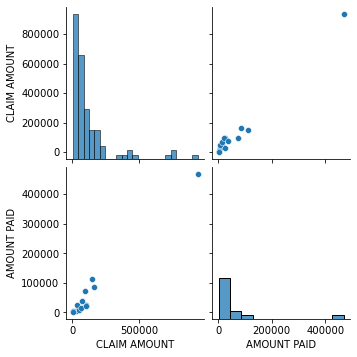

In [24]:
sns.pairplot(data)

<AxesSubplot:xlabel='CITY SUBSIDIARIES', ylabel='CLAIM AMOUNT'>

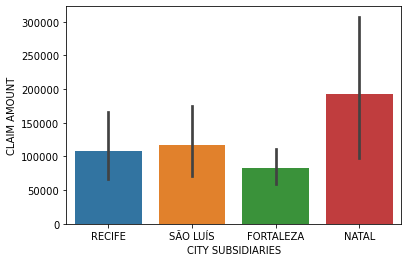

In [25]:
sns.barplot(x='CITY SUBSIDIARIES' , y = 'CLAIM AMOUNT' , data = data)
#NATAL is the city with the highest claim amount(about 200000)
#FORTALEZA is the city with the lowest claim amount(about 7000)

<AxesSubplot:xlabel='CITY SUBSIDIARIES', ylabel='AMOUNT PAID'>

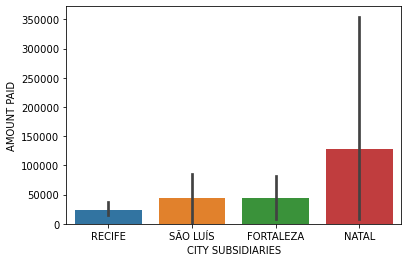

In [26]:
sns.barplot(x='CITY SUBSIDIARIES' , y = 'AMOUNT PAID' , data = data)
#NATAL also has the highest amount paid
#RECIFE has the lowest amount paid
#The claim amount for NATAL differs from the amount paid by 200000-140000 = 60000
#The claim amount for FORTALEZA difeers from the amount paid by about 90000-50000=40000
#The claim amount for SAO LUIS  differs from the amount paid by about 10000-50000=50000
#The claim amount for RECIFE differs from the amount paid by about 100000-30000=70000

<AxesSubplot:xlabel='CLAIM AMOUNT', ylabel='AMOUNT PAID'>

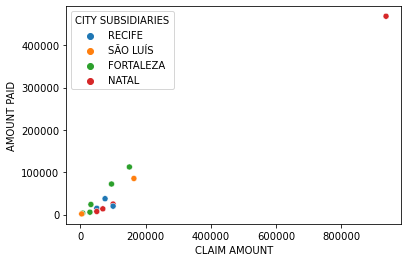

In [27]:
sns.scatterplot(x='CLAIM AMOUNT', y='AMOUNT PAID', data=data, hue='CITY SUBSIDIARIES')

<AxesSubplot:xlabel='CLAIM START DATE', ylabel='CLAIM AMOUNT'>

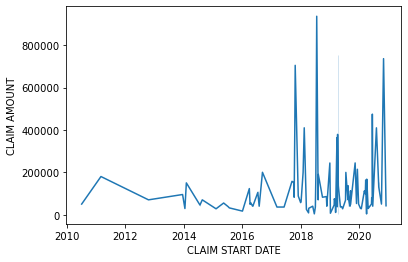

In [28]:
sns.lineplot(x='CLAIM START DATE' , y='CLAIM AMOUNT', data=data)
#From the line plot ,the claim amount was highest in the year 2018

<AxesSubplot:xlabel='CLAIM START DATE', ylabel='AMOUNT PAID'>

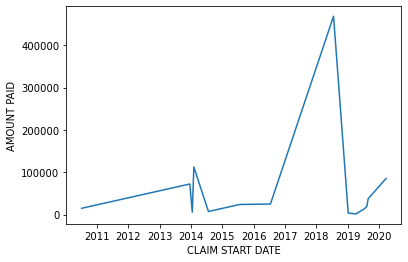

In [29]:
sns.lineplot(x='CLAIM START DATE' , y='AMOUNT PAID', data=data)
#The amount paid was highest in the year 2018
#In the year 2018 the food chain store experience the highest growth

<AxesSubplot:xlabel='AREA', ylabel='CLAIM AMOUNT'>

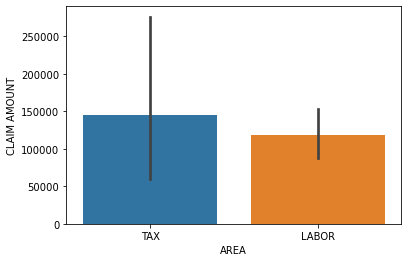

In [30]:
sns.barplot(x='AREA', y ='CLAIM AMOUNT', data=data)
#there is a balance between the claim amount from tax and labor

<AxesSubplot:xlabel='CONTRACT TYPE', ylabel='CLAIM AMOUNT'>

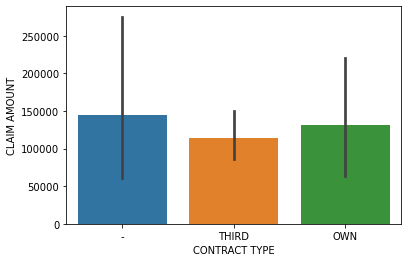

In [31]:
sns.barplot(x='CONTRACT TYPE', y ='CLAIM AMOUNT', data=data)
#there is a balanace between the claim amount from customers that has no contract type and those that belongs to OWN contract type.

### REPORT FOR THE PROJECT

1.From the dataset, after performing data cleaning and exporing the data , We can infer that the CLAIM AMOUNT in natal is the highest
and Fortaleza has the lowest claim amount, the claim amount for  Recife and Sao Luis are relatively close in value(about 10,000), Natal 
city also has the highest amount paid while Recife has the lowest amount paid. The amount paid for Sao Luis and Fortaleza are 
relatively close in value.

2i)The claim amount for NATAL differs from the amount paid by 200000-140000 = 60000
ii)The claim amount for FORTALEZA difeers from the amount paid by about 90000-50000=40000
iii)The claim amount for SAO LUIS  differs from the amount paid by about 10000-50000=50000
iv)The claim amount for RECIFE differs from the amount paid by about 100000-30000=70000

3. We can learn after comparing the Claim amount and the amount paid , that the claim amount is higher than the amount paid, after
performing exploratory data analysis.